In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",])
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package names to /home/deepank/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/deepank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/deepank/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/deepank/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/deepank/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/deepank/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/deepank/nltk_data.

True

In [6]:
df=pd.read_csv('./MR data .csv')
pd.set_option('display.max_colwidth', None)
df=df.fillna(0)
print(df.columns)
df.head(10)
df.shape

Index(['City ', 'Title', 'Text', 'Murder_reason', 'Kidnapping',
       'Women_reason'],
      dtype='object')


(506, 6)

In [7]:
df2=df
for i in range(0,len(df)):
    if not (df.loc[i,'Women_reason']!=0 or df.loc[i,'Murder_reason']!=0 or df.loc[i,'Kidnapping']!=0):
        df2=df2.drop([i])
df2=df2.reset_index(drop=True)
print(df2.shape)


(400, 6)


In [8]:
'''Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other
Crime Against Women:\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act'''


'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other\nCrime Against Women:\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act'

In [9]:
text=[]
for i in range(0,len(df2)):
    text.append(nltk.word_tokenize(df2.loc[i,'Text']))

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer

import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []
    rem=['’','“','”',"'s",'wa','ha']
    for token in tweet_tokens:
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token)

        if len(token) > 0 and token not in rem and not token.isdecimal() and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

clean_text=[]

for i in text:
    clean_text.append(remove_noise(i,stop_words))

In [12]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [13]:
from nltk import FreqDist
all_words=get_all_words(clean_text)
fd = FreqDist(all_words)

In [14]:
clean_text[-1]

['lucknow',
 'customer',
 'knifed',
 'fish',
 'vendor',
 'death',
 'chinhat',
 'market',
 'late',
 'sunday',
 'afternoon',
 'latter',
 'refused',
 'reduce',
 'price',
 'rohu',
 'rs',
 'nabbed',
 'shocked',
 'onlooker',
 'brief',
 'chase',
 'handed',
 'police',
 'deceased',
 'rakesh',
 'kashyap',
 'resident',
 'buddha',
 'vihar',
 'chinhat',
 'police',
 'identified',
 'accused',
 'naveen',
 'kumbhkar',
 'native',
 'chhattisgarh',
 'life',
 'chinhat',
 'eyewitnesses',
 'said',
 'bizarre',
 'attack',
 'took',
 'place',
 'around',
 '4pm',
 'buyer',
 'naveen',
 'haggling',
 'price',
 'rohu',
 'wanted',
 'vendor',
 'lower',
 'rate',
 'rs',
 'latter',
 'refused',
 'perhaps',
 'taunted',
 'petty',
 'infuriated',
 'man',
 'grabbed',
 'knife',
 'fish',
 'stall',
 'attacked',
 'vendor',
 'said',
 'eyewitness',
 'naveen',
 'first',
 'made',
 'lightning',
 'swipe',
 'rakesh',
 'throat',
 'randomly',
 'stabbed',
 'time',
 'vendor',
 'bled',
 'profusely',
 'attacker',
 'tried',
 'flee',
 'flashing',


In [15]:
print(fd.most_common(50))

[('police', 1431), ('said', 1252), ('girl', 532), ('accused', 525), ('woman', 446), ('house', 340), ('two', 330), ('family', 325), ('case', 321), ('singh', 309), ('complaint', 296), ('station', 293), ('body', 291), ('also', 284), ('told', 279), ('kumar', 279), ('found', 275), ('around', 250), ('allegedly', 247), ('lucknow', 246), ('father', 245), ('ghaziabad', 236), ('arrested', 229), ('area', 208), ('murder', 207), ('home', 204), ('man', 198), ('took', 195), ('hospital', 195), ('added', 194), ('fir', 193), ('three', 179), ('later', 178), ('sho', 175), ('victim', 173), ('daughter', 171), ('one', 171), ('resident', 169), ('registered', 167), ('husband', 164), ('wife', 160), ('incident', 160), ('year', 159), ('officer', 158), ('lodged', 155), ('section', 146), ('mother', 144), ('son', 143), ('kanpur', 142), ('wednesday', 141)]


In [16]:
import itertools
clean_text_all=list(itertools.chain.from_iterable(clean_text))
print (len(clean_text_all))

59055


In [17]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(100)

[(('victim', 'identity', 'revealed'), 29),
 (('identity', 'revealed', 'protect'), 29),
 (('revealed', 'protect', 'privacy'), 29),
 (('protect', 'privacy', 'per'), 29),
 (('privacy', 'per', 'supreme'), 29),
 (('per', 'supreme', 'court'), 29),
 (('supreme', 'court', 'directive'), 29),
 (('court', 'directive', 'case'), 29),
 (('directive', 'case', 'related'), 29),
 (('case', 'related', 'sexual'), 29),
 (('related', 'sexual', 'assault'), 29),
 (('declared', 'brought', 'dead'), 28),
 (('nagar', 'police', 'station'), 25),
 (('station', 'house', 'officer'), 25),
 (('kavi', 'nagar', 'police'), 24),
 (('police', 'station', 'said'), 23),
 (('incident', 'took', 'place'), 23),
 (('kgmu', 'trauma', 'centre'), 21),
 (('protection', 'children', 'sexual'), 20),
 (('children', 'sexual', 'offences'), 20),
 (('sexual', 'offences', 'pocso'), 17),
 (('offences', 'pocso', 'act'), 17),
 (('police', 'officer', 'said'), 17),
 (('police', 'control', 'room'), 17),
 (('indirapuram', 'police', 'station'), 15),
 ((

In [18]:
finder = nltk.collocations.BigramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(20)

[(('police', 'station'), 242),
 (('police', 'said'), 237),
 (('told', 'toi'), 99),
 (('family', 'member'), 94),
 (('said', 'police'), 81),
 (('told', 'police'), 74),
 (('singh', 'said'), 73),
 (('according', 'police'), 71),
 (('rs', 'lakh'), 57),
 (('kavi', 'nagar'), 47),
 (('informed', 'police'), 46),
 (('sexual', 'assault'), 45),
 (('fir', 'registered'), 44),
 (('took', 'place'), 44),
 (('pocso', 'act'), 43),
 (("''", 'said'), 39),
 (('girl', 'father'), 37),
 (('ipc', 'section'), 37),
 (('officer', 'said'), 37),
 (('case', 'registered'), 37)]

In [19]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(20)

[(('victim', 'identity', 'revealed', 'protect'), 29),
 (('identity', 'revealed', 'protect', 'privacy'), 29),
 (('revealed', 'protect', 'privacy', 'per'), 29),
 (('protect', 'privacy', 'per', 'supreme'), 29),
 (('privacy', 'per', 'supreme', 'court'), 29),
 (('per', 'supreme', 'court', 'directive'), 29),
 (('supreme', 'court', 'directive', 'case'), 29),
 (('court', 'directive', 'case', 'related'), 29),
 (('directive', 'case', 'related', 'sexual'), 29),
 (('case', 'related', 'sexual', 'assault'), 29),
 (('protection', 'children', 'sexual', 'offences'), 20),
 (('kavi', 'nagar', 'police', 'station'), 20),
 (('children', 'sexual', 'offences', 'pocso'), 17),
 (('sexual', 'offences', 'pocso', 'act'), 17),
 (('sihani', 'gate', 'police', 'station'), 13),
 (('ssp', 'lucknow', 'kalanidhi', 'naithani'), 13),
 (('related', 'sexual', 'assault', 'lucknow'), 12),
 (('sp', 'city', 'shlok', 'kumar'), 11),
 (('shlok', 'kumar', 'sp', 'city'), 10),
 (('section', 'protection', 'children', 'sexual'), 9)]

In [20]:
from statistics import mean
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
cnt=0
ls=[]
for i in range(0,len(text)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text'])]
    m=mean(scores)
    print(m)
    ls.append(m)
    if m>0:
        cnt+=1
    else:
        cnt-=1
print(cnt,len(text))
print(mean(ls))

-0.3139571428571429
-0.10071290322580645
-0.2908733333333333
-0.31464285714285717
-0.29018421052631577
-0.22986470588235294
-0.08157857142857144
-0.47988571428571425
-0.2550181818181818
-0.20394545454545454
-0.15777083333333333
-0.3133923076923077
-0.24532857142857142
-0.183745
-0.3286235294117647
-0.3476266666666667
-0.1817111111111111
-0.2556764705882353
-0.3769125
-0.32505833333333334
-0.42335999999999996
-0.14687
-0.310056
-0.020075000000000006
-0.48536999999999997
-0.22796296296296298
-0.26513333333333333
-0.20574615384615383
-0.3371692307692308
-0.20586470588235295
-0.19059333333333334
-0.1754181818181818
-0.3741222222222222
-0.21030666666666667
-0.11406249999999998
-0.29804444444444445
-0.5766
-0.18266923076923075
-0.10613636363636364
-0.3526111111111111
-0.18395
-0.24236923076923078
-0.22991111111111112
-0.08504999999999999
-0.239375
-0.17566315789473685
-0.35568235294117645
-0.5317933333333333
-0.3538818181818182
-0.06945833333333334
-0.53038
-0.12538749999999999
-0.26112
-0.2

In [21]:
import numpy as np
print(mean(ls))
print(([i>-0.2699 for i in ls].count(1)))
print(np.std(ls))

-0.26785788566466784
202
0.12155507100832019


In [22]:
from statistics import mean
bias_vic=[]

for i in range(0,len(text)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
    if len(scores)!=0:
        bias_vic.append(mean(scores))
print(len(bias_vic))    
print(mean(bias_vic),np.var(bias_vic))

151
-0.18183174471775465 0.2236714200979862


In [23]:
from statistics import mean
for q in range(1,9,1):
    print("Reason :",q)
    bias_vic=[]
    for i in range(0,len(text)):
        if int(df2.loc[i,'Murder_reason'])==q:
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
            if len(scores)!=0:
                bias_vic.append(mean(scores))
    print(len(bias_vic)) 
    if len(bias_vic)!=0:
        print(mean(bias_vic),np.var(bias_vic))
    

Reason : 1
6
-0.44315666666666664 0.06996405405555554
Reason : 2
4
-0.27681666666666666 0.08211762750000001
Reason : 3
7
-0.45708571428571426 0.04201166979591836
Reason : 4
7
-0.32444999999999996 0.07050519357142856
Reason : 5
8
-0.6716624999999999 0.041717576718749996
Reason : 6
12
-0.3784180555555556 0.06302206636381173
Reason : 7
1
-0.52665 0.0
Reason : 8
17
-0.3741892156862745 0.07584852254709727


In [24]:
from statistics import mean
for q in range(1,11,1):
    print("Reason :",q)
    bias_vic=[]
    for i in range(0,len(text)):
        if str(q) in str(df2.loc[i,'Women_reason']).split(','):
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
            if len(scores)!=0:
                bias_vic.append(mean(scores))
    print(len(bias_vic)) 
    if len(bias_vic)!=0:
        print(mean(bias_vic),np.var(bias_vic))

Reason : 1
11
-0.18689 0.28534109172727273
Reason : 2
3
-0.21546666666666667 0.009645475555555552
Reason : 3
5
-0.392036 0.012622921983999998
Reason : 4
3
-0.006841666666666667 0.014116638472222226
Reason : 5
2
-0.36987499999999995 0.0015073806249999977
Reason : 6
8
-0.2967020833333333 0.10335262003038194
Reason : 7
28
-0.030404349489795913 0.18546717180119301
Reason : 8
28
0.1000657738095238 0.3604616902000957
Reason : 9
5
-0.13205666666666668 0.3266811641777777
Reason : 10
14
-0.03754607142857142 0.21188869683555842


In [25]:
from statistics import mean
bias_acc=[]

for i in range(0,len(text)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
    #print(scores)
    if len(scores)!=0:
        bias_acc.append(mean(scores))
print(len(bias_acc))
print(mean(bias_acc),np.std(bias_acc))

260
-0.5092503170024419 0.21923642022461134


/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density of Articles.')

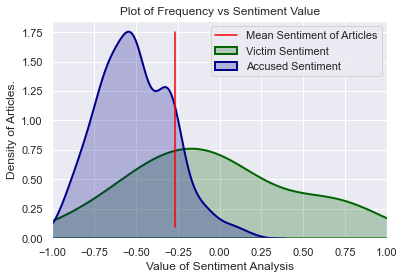

In [26]:
sns.distplot(bias_vic, hist=False, kde=True, 
             bins=25, color = 'darkgreen', 
             kde_kws={'shade': True,'linewidth': 2})
sns.distplot(bias_acc, hist=False, kde=True, 
             bins=25, color = 'darkblue', 
             kde_kws={'shade': True,'linewidth': 2})
plt.axvline(x=-0.26785788566466784,ymax=0.95,ymin=0.05,color='red')
0.12155507100832019
# Add labels
plt.xlim(-1, 1)
plt.legend(["Mean Sentiment of Articles","Victim Sentiment", "Accused Sentiment"], loc ="upper right")  
plt.title('Plot of Frequency vs Sentiment Value')
plt.xlabel('Value of Sentiment Analysis')
plt.ylabel('Density of Articles.')

In [27]:
from statistics import mean
bias_vic=[]

for i in range(0,len(text)):
    if str(df2.loc[i,'Women_reason'])!="0": 
        scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
        if len(scores)!=0:
            bias_vic.append(mean(scores))
print(len(bias_vic))    
print(mean(bias_vic),np.var(bias_vic))

88
-0.031168410443722944 0.26297028214980034


In [28]:
from statistics import mean
bias_acc=[]

for i in range(0,len(text)):
    if str(df2.loc[i,'Women_reason'])!="0": 
        scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower()]
        if len(scores)!=0:
            bias_acc.append(mean(scores))
print(len(bias_acc))    
print(mean(bias_acc),np.var(bias_acc))

133
-0.49777327634562596 0.05249754889120935


/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density of Articles.')

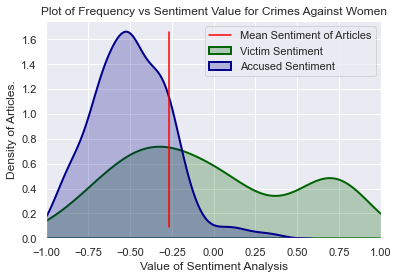

In [29]:
sns.distplot(bias_vic, hist=False, kde=True, 
             bins=25, color = 'darkgreen', 
             kde_kws={'shade': True,'linewidth': 2})
sns.distplot(bias_acc, hist=False, kde=True, 
             bins=25, color = 'darkblue', 
             kde_kws={'shade': True,'linewidth': 2})
plt.axvline(x=-0.26785788566466784,ymax=0.95,ymin=0.05,color='red')
0.12155507100832019
# Add labels
plt.xlim(-1, 1)
plt.legend(["Mean Sentiment of Articles","Victim Sentiment", "Accused Sentiment"], loc ="upper right")  
plt.title('Plot of Frequency vs Sentiment Value for Crimes Against Women')
plt.xlabel('Value of Sentiment Analysis')
plt.ylabel('Density of Articles.')

In [30]:
from statistics import mean
bias_vic=[]

for i in range(0,len(text)):
    if int(df2.loc[i,'Murder_reason'])!=0: 
        scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
        if len(scores)!=0:
            bias_vic.append(mean(scores))
print(len(bias_vic))    
print(mean(bias_vic),np.var(bias_vic))

62
-0.41998612903225807 0.07497635789791883


In [31]:
from statistics import mean
bias_acc=[]

for i in range(0,len(text)):
    if int(df2.loc[i,'Murder_reason'])!=0: 
        scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower()]
        if len(scores)!=0:
            bias_acc.append(mean(scores))
print(len(bias_acc))    
print(mean(bias_acc),np.var(bias_acc))

107
-0.4938662016021362 0.05390908927371986


/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/deepank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density of Articles.')

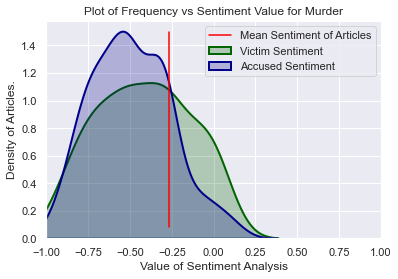

In [32]:
sns.distplot(bias_vic, hist=False, kde=True, 
             bins=25, color = 'darkgreen', 
             kde_kws={'shade': True,'linewidth': 2})
sns.distplot(bias_acc, hist=False, kde=True, 
             bins=25, color = 'darkblue', 
             kde_kws={'shade': True,'linewidth': 2})
plt.axvline(x=-0.26785788566466784,ymax=0.95,ymin=0.05,color='red')
# Add labels
plt.xlim(-1, 1)
plt.legend(["Mean Sentiment of Articles","Victim Sentiment", "Accused Sentiment"], loc ="upper right")  
plt.title('Plot of Frequency vs Sentiment Value for Murder')
plt.xlabel('Value of Sentiment Analysis')
plt.ylabel('Density of Articles.')

In [33]:
from statistics import mean
for q in range(1,9,1):
    print("Reason :",q)
    bias_acc=[]
    for i in range(0,len(text)):
        if int(df2.loc[i,'Murder_reason'])==q:
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
            if len(scores)!=0:
                bias_acc.append(mean(scores))
    print(len(bias_acc)) 
    if len(bias_acc)!=0:
        print(mean(bias_acc),np.var(bias_acc))

Reason : 1
8
-0.5345348214285714 0.029037663844866064
Reason : 2
12
-0.4535902777777778 0.0788302129841821
Reason : 3
18
-0.5750788888888889 0.028678554122222217
Reason : 4
8
-0.4658333333333333 0.02576765944444444
Reason : 5
14
-0.6494916666666667 0.022450736696428577
Reason : 6
20
-0.479338 0.04446709916377778
Reason : 7
1
-0.296 0.0
Reason : 8
34
-0.45338700980392155 0.07210467484146721


In [34]:
from statistics import mean
for q in range(1,11,1):
    print("Reason :",q)
    bias_acc=[]
    for i in range(0,len(text)):
        if str(q) in str(df2.loc[i,'Women_reason']).split(','):
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
            if len(scores)!=0:
                bias_acc.append(mean(scores))
    print(len(bias_acc)) 
    if len(bias_acc)!=0:
        print(mean(bias_acc),np.var(bias_acc))

Reason : 1
11
-0.6347215151515152 0.0350208032754821
Reason : 2
11
-0.5747324242424242 0.03845454069513315
Reason : 3
13
-0.5154203846153846 0.03799547222998027
Reason : 4
5
-0.5462333333333333 0.016958369777777784
Reason : 5
2
-0.17160625 0.12065636441406252
Reason : 6
12
-0.39531647817460314 0.058170394300324675
Reason : 7
46
-0.5170740458937197 0.043171121052759845
Reason : 8
51
-0.515921568627451 0.037983493694816094
Reason : 9
6
-0.4114380952380952 0.02959112561933107
Reason : 10
23
-0.513528381642512 0.04786352987114637


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def word_sent(s):
    global df2
    ls=[]
    for i in range(0,len(text)):
        for j in s:
            if j in df2.loc[i,'Text'].lower():
                #print(df2.loc[i,'Text'].lower())
                scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Text'])]
                m=mean(scores)
                ls.append(m)
                break
    print("Length:-",len(ls))
    print("Mean:-",mean(ls),np.std(ls))
    print(ls)
    bias=[]
    for i in range(0,len(text)):
        scores=[]
        for sentence in nltk.sent_tokenize(df2.loc[i,'Text']):
            for j in s:
                if j in sentence.lower():
                    #print(sentence)
                    scores.append(sia.polarity_scores(sentence)["compound"])
                    break
        if len(scores)!=0:
            bias.append(mean(scores))
    print(bias)
    print("Mean Bias sentence based:-",mean(bias),np.std(bias))
    return ls,bias

In [36]:
l_dal,b_dal=word_sent(['dalit','sc/st'])

Length:- 13
Mean:- -0.21827146699190042 0.0943888683682849
[-0.29018421052631577, -0.18795294117647057, -0.07274545454545454, -0.2714, -0.3777, -0.3462909090909091, -0.283925, -0.15788333333333332, -0.07536666666666667, -0.22985555555555554, -0.1444, -0.1318, -0.268025]
[0.0, -0.5267, -0.0258, -0.3825, 0.2023, -0.418, 0.1027, -0.5267, -0.7184, -0.296, -0.4221, -0.657, -0.4588]
Mean Bias sentence based:- -0.31746153846153846 0.28309551130441835


In [37]:
l_mul,b_mul=word_sent(['islam','muslim','zihaad','zihad'])

Length:- 5
Mean:- -0.24764500695762176 0.0719338108532501
[-0.3286235294117647, -0.23686666666666667, -0.17368, -0.16670000000000001, -0.3323548387096774]
[-0.6808, -0.926, 0.6808, 0.0, -0.5768]
Mean Bias sentence based:- -0.30056 0.5771429549080539


In [38]:
l_hin,b_hin=word_sent(['hindu'])

Length:- 4
Mean:- -0.28075932447928414 0.061376868778205675
[-0.3132923076923077, -0.17620833333333333, -0.30118181818181816, -0.3323548387096774]
[-0.7405, -0.7482, 0.0, 0.03959999999999999]
Mean Bias sentence based:- -0.362275 0.38234112631915496


In [39]:
l_con,b_con=word_sent(['congress'])

Length:- 5
Mean:- -0.19975238888888888 0.07852097534259929
[-0.060177777777777774, -0.19832666666666665, -0.19096666666666667, -0.2696708333333333, -0.27962]
[-0.1027, -0.5274333333333333, -0.5246, 0.0258, -0.55545]
Mean Bias sentence based:- -0.33687666666666666 0.24726474511700566


In [40]:
l_bjp,b_bjp=word_sent(['bjp'])

Length:- 7
Mean:- -0.25827146708683474 0.10202461043871373
[-0.06945833333333334, -0.41640625, -0.2633, -0.29786999999999997, -0.23668235294117648, -0.33321666666666666, -0.19096666666666667]
[-0.1806, -0.60605, 0.128, -0.27505999999999997, -0.15594999999999998, 0.3818, -0.3818]
Mean Bias sentence based:- -0.15566571428571427 0.30194492079834423


In [41]:
l_bsp,b_bsp=word_sent(['bsp','bahujan'])

Length:- 4
Mean:- -0.2574665131578947 0.11738165219488315
[-0.06945833333333334, -0.31742105263157894, -0.3846333333333333, -0.2583533333333333]
[0.4019, -0.29913333333333336, -0.3818, 0.4767]
Mean Bias sentence based:- 0.049416666666666664 0.3918706621237846


In [42]:
l_sam,b_sam=word_sent(['samajwadi'])

Length:- 2
Mean:- -0.3217532738095238 0.052082440476190484
[-0.37383571428571427, -0.2696708333333333]
[0.1613, 0.0258]
Mean Bias sentence based:- 0.09355 0.06774999999999999


In [43]:
l_girl,b_girl=word_sent(['girl','woman','female','women','wife','daughter','sister','mother',])

Length:- 331
Mean:- -0.2602757248806842 0.1180143381833529
[-0.3139571428571429, -0.10071290322580645, -0.2908733333333333, -0.31464285714285717, -0.29018421052631577, -0.22986470588235294, -0.08157857142857144, -0.2550181818181818, -0.15777083333333333, -0.3133923076923077, -0.24532857142857142, -0.183745, -0.3286235294117647, -0.3476266666666667, -0.2556764705882353, -0.3769125, -0.42335999999999996, -0.14687, -0.310056, -0.020075000000000006, -0.22796296296296298, -0.26513333333333333, -0.20574615384615383, -0.3371692307692308, -0.20586470588235295, -0.19059333333333334, -0.1754181818181818, -0.21030666666666667, -0.11406249999999998, -0.29804444444444445, -0.5766, -0.18266923076923075, -0.10613636363636364, -0.3526111111111111, -0.18395, -0.24236923076923078, -0.22991111111111112, -0.08504999999999999, -0.239375, -0.17566315789473685, -0.35568235294117645, -0.3538818181818182, -0.53038, -0.26112, -0.21203076923076922, -0.30202666666666667, -0.31742105263157894, -0.5166333333333333,

In [44]:
l_boy,b_boy=word_sent(['boy','man','male','men','husband','son','brother','father'])

Length:- 389
Mean:- -0.266132210801537 0.12124127159638337
[-0.3139571428571429, -0.10071290322580645, -0.2908733333333333, -0.31464285714285717, -0.29018421052631577, -0.22986470588235294, -0.08157857142857144, -0.47988571428571425, -0.2550181818181818, -0.15777083333333333, -0.3133923076923077, -0.24532857142857142, -0.183745, -0.3286235294117647, -0.3476266666666667, -0.1817111111111111, -0.2556764705882353, -0.3769125, -0.32505833333333334, -0.42335999999999996, -0.14687, -0.310056, -0.020075000000000006, -0.48536999999999997, -0.22796296296296298, -0.26513333333333333, -0.20574615384615383, -0.3371692307692308, -0.20586470588235295, -0.19059333333333334, -0.1754181818181818, -0.3741222222222222, -0.21030666666666667, -0.11406249999999998, -0.29804444444444445, -0.5766, -0.18266923076923075, -0.10613636363636364, -0.3526111111111111, -0.18395, -0.24236923076923078, -0.22991111111111112, -0.08504999999999999, -0.239375, -0.17566315789473685, -0.35568235294117645, -0.5317933333333333

Text(0, 0.5, 'Value of Sentiment Bias.')

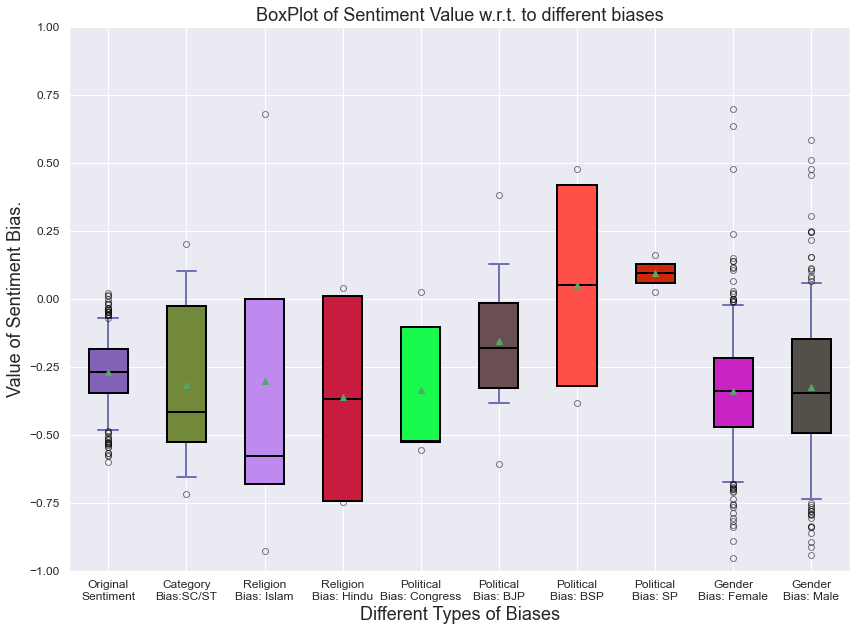

In [84]:
import pandas as pd
#temp=pd.DataFrame({'Original Sentiment':ls,'Category Bias:SC/ST':b_dal,'Religion Bias: Islam':b_mul,'Religion Bias: Hindi':b_hin,'Political Bias: Congress':b_con,'Political Bias: BJP':b_bjp})
fig = plt.figure(1, figsize=(14, 10))
import random
import matplotlib


SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# Create an axes instance
ax = fig.add_subplot(111)

bp = ax.boxplot([ls,b_dal,b_mul,b_hin,b_con,b_bjp,b_bsp,b_sam,b_boy,b_girl], showmeans=True,whis=[5,95],labels=['Original\nSentiment','Category\nBias:SC/ST','Religion\nBias: Islam','Religion\nBias: Hindu', 'Political\nBias: Congress','Political\nBias: BJP','Political\nBias: BSP','Political\nBias: SP','Gender\nBias: Female', 'Gender\nBias: Male'],patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#000000', linewidth=2)
    # change fill color
    
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    box.set( facecolor = hex_number )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#000000', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

    # Add labels
plt.ylim(-1, 1)
#ax.set_xticklabels(xticklabels, rotation = 45, ha="right")
#plt.legend(["Article Sentiment", "Title Sentiment",'c','d'], loc ="upper right")  
plt.title('BoxPlot of Sentiment Value w.r.t. to different biases')
plt.xlabel('Different Types of Biases')
plt.ylabel('Value of Sentiment Bias.')

In [ ]:
clean_text_join=clean_text
for i in range(0,len(clean_text)):
    clean_text_join[i]=' '.join(clean_text[i])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(clean_text_join).toarray()

In [ ]:
X.shape

In [ ]:
y=[0]*len(df2)
j=0
X2=X
for i in range(len(df2)-1,-1,-1):
    if ',' in str(df2.loc[i,'Women_reason']):
        y[i]=int(df2.loc[i,'Women_reason'].split(',')[-1].strip())
        for q in df2.loc[i,'Women_reason'].split(',')[:-1]:
            X2=np.insert(X2,i,X2[i],axis=0)
            y.insert(i,int(str(q).strip()))
    else:
        y[i]=int(str(df2.loc[i,'Women_reason']).strip())

In [ ]:
print(len(y))
X2.shape

In [ ]:
y=np.array(y)
y2=y>0
print(len(y2))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#auto-classification

In [ ]:
text2=[]
for i in range(0,len(df2)):
    text2.append(nltk.word_tokenize(df2.loc[i,'Title']))

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []
    rem=['’','“','”',"'s",'wa','ha']
    for token in tweet_tokens:
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token)

        if len(token) > 0 and token not in rem and not token.isdecimal() and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
clean_text2=[]

for i in text2:
    clean_text2.append(remove_noise(i,stop_words))

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [ ]:
from nltk import FreqDist
all_words=get_all_words(clean_text2)
fd = FreqDist(all_words)

In [ ]:
clean_text2[-1]

In [ ]:
print(fd.most_common(50))

In [ ]:
import itertools
clean_text_all=list(itertools.chain.from_iterable(clean_text2))
print (len(clean_text_all))

In [ ]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(10)

In [ ]:
finder = nltk.collocations.BigramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(10)

In [ ]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(clean_text_all)
finder.ngram_fd.most_common(10)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
cnt=0
ls2=[]
for i in range(0,len(text2)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title'])]
    m=mean(scores)
    print(m)
    ls2.append(m)
    if m>0:
        cnt+=1
    else:
        cnt-=1
print(cnt,len(text))
print(mean(ls2))

In [ ]:
import numpy as np
print(mean(ls2))
print(([i>-0.473918 for i in ls2].count(1)))
print(np.std(ls2))

In [ ]:
sns.distplot(ls, hist=False, kde=True, 
             bins=50, color = 'darkred', 
             kde_kws={'shade': True,'linewidth': 2})
sns.distplot(ls2, hist=False, kde=True, 
             bins=50, color = 'darkgreen', 
             kde_kws={'shade': True,'linewidth': 2})
# Add labels
plt.xlim(-1, 1)
plt.legend(["Article Sentiment", "Title Sentiment"], loc ="upper right")  
plt.title('Plot of Frequency vs Sentiment Value')
plt.xlabel('Value of Sentiment Bias')
plt.ylabel('Density of Articles.')

In [ ]:
import pandas as pd
temp=pd.DataFrame({'Article Analysis':ls,'Title Analysis':ls2})
my_pal = {'Article Analysis':'#ff6666','Title Analysis':"#33dd33"}
sns.boxplot(data=temp, width=.6, palette=my_pal,whis=[5,95])

In [ ]:
from statistics import mean
bias_vic=[]

for i in range(0,len(text2)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
    if len(scores)!=0:
        bias_vic.append(mean(scores))
print(len(bias_vic))    
print(mean(bias_vic),np.var(bias_vic))

In [ ]:
from statistics import mean
for q in range(1,9,1):
    print("Reason :",q)
    bias_vic=[]
    for i in range(0,len(text2)):
        if int(df2.loc[i,'Murder_reason'])==q:
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
            if len(scores)!=0:
                bias_vic.append(mean(scores))
    print(len(bias_vic)) 
    if len(bias_vic)!=0:
        print(mean(bias_vic),np.var(bias_vic))

In [ ]:
from statistics import mean
for q in range(1,11,1):
    print("Reason :",q)
    bias_vic=[]
    for i in range(0,len(text2)):
        if str(q) in str(df2.loc[i,'Women_reason']).split(','):
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
            if len(scores)!=0:
                bias_vic.append(mean(scores))
    print(len(bias_vic)) 
    if len(bias_vic)!=0:
        print(mean(bias_vic),np.var(bias_vic))

In [ ]:
from statistics import mean
bias_acc=[]

for i in range(0,len(text2)):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
    #print(scores)
    if len(scores)!=0:
        bias_acc.append(mean(scores))
print(len(bias_acc))
print(mean(bias_acc))

In [ ]:
from statistics import mean
for q in range(1,9,1):
    print("Reason :",q)
    bias_acc=[]
    for i in range(0,len(text2)):
        if int(df2.loc[i,'Murder_reason'])==q:
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
            if len(scores)!=0:
                bias_acc.append(mean(scores))
    print(len(bias_acc)) 
    if len(bias_acc)!=0:
        print(mean(bias_acc),np.var(bias_acc))

In [ ]:
from statistics import mean
for q in range(1,11,1):
    print("Reason :",q)
    bias_acc=[]
    for i in range(0,len(text2)):
        if str(q) in str(df2.loc[i,'Women_reason']).split(','):
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'accused' in sentence.lower() or 'murderer' in sentence.lower() or 'assaulted' in sentence.lower() or 'rapist' in sentence.lower() or 'killer' in sentence.lower()]
            if len(scores)!=0:
                bias_acc.append(mean(scores))
    print(len(bias_acc)) 
    if len(bias_acc)!=0:
        print(mean(bias_acc),np.var(bias_acc))

In [ ]:
from statistics import mean
for q in range(1,11,1):
    print("Reason :",q)
    bias_acc=[]
    for i in range(0,len(text2)):
        if str(q) in str(df2.loc[i,'Women_reason']).split(','):
            scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title']) if 'victim' in sentence.lower() or 'survivor' in sentence.lower()]
            if len(scores)!=0:
                bias_acc.append(mean(scores))
    print(len(bias_acc)) 
    if len(bias_acc)!=0:
        print(mean(bias_acc),np.var(bias_acc))

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def word_sent2(s):
    global df2
    ls=[]
    for i in range(0,len(text2)):
        for j in s:
            if j in df2.loc[i,'Title'].lower():
                #print(df2.loc[i,'Text'].lower())
                scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(df2.loc[i,'Title'])]
                m=mean(scores)
                ls.append(m)
                break
    print("Length:-",len(ls))
    if len(ls)!=0:
        print("Mean:-",mean(ls),np.std(ls))
    print(ls)
    bias=[]
    for i in range(0,len(text2)):
        scores=[]
        for sentence in nltk.sent_tokenize(df2.loc[i,'Title']):
            for j in s:
                if j in sentence.lower():
                    #print(sentence)
                    scores.append(sia.polarity_scores(sentence)["compound"])
                    break
        if len(scores)!=0:
            bias.append(mean(scores))
    print(bias)
    if len(bias)!=0:
        print("Mean Bias sentence based:-",mean(bias),np.std(bias))
    return ls,bias

In [ ]:
l_dal,b_dal=word_sent2(['dalit','sc/st'])

In [ ]:
l_mul,b_mul=word_sent2(['islam','muslim'])

In [ ]:
l_mul,b_mul=word_sent2(['hindu'])

In [ ]:
l_mul,b_mul=word_sent2(['congress'])

In [ ]:
l_mul,b_mul=word_sent2(['bjp'])

In [ ]:
l_mul,b_mul=word_sent2(['bsp','bahujan'])

In [ ]:
l_mul,b_mul=word_sent2(['samajwadi'])

In [ ]:
l_mul,b_mul=word_sent2(['girl','woman','female','women','wife','daughter','sister','mother',])

In [ ]:
l_mul,b_mul=word_sent2(['boy','man','male','men','husband','son','brother','father'])

In [ ]:
clean_text_join2=clean_text2
for i in range(0,len(clean_text2)):
    clean_text_join2[i]=' '.join(clean_text2[i])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(clean_text_join2).toarray()

In [ ]:
X.shape

In [ ]:
y=[0]*len(df2)
j=0
X2=X
for i in range(len(df2)-1,-1,-1):
    if ',' in str(df2.loc[i,'Women_reason']):
        y[i]=int(df2.loc[i,'Women_reason'].split(',')[-1].strip())
        for q in df2.loc[i,'Women_reason'].split(',')[:-1]:
            X2=np.insert(X2,i,X2[i],axis=0)
            y.insert(i,int(str(q).strip()))
    else:
        y[i]=int(str(df2.loc[i,'Women_reason']).strip())

In [ ]:
print(len(y))
X2.shape

In [ ]:
y=np.array(y)
y2=y>0
print(len(y2))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#auto-classification